In [1]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from random import randrange, sample
from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import mne
from pickle import dump, load
import torch
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split, Subset
import torch.nn as nn
import torch.nn.functional as F
from collections import Counter
import joblib
import time

In [2]:
EEG_files = ['../../code/LabCode/Fiber_photometry/mouse_807/mouse_807_230511.edf', 
            '../../code/LabCode/Fiber_photometry/mouse_994/mouse_994_230713.edf', 
            '../../code/LabCode/Fiber_photometry/mouse_998/mouse_998_230727.edf', 
            '../../code/LabCode/Fiber_photometry/mouse_1002/mouse_1002_230725.edf',
             '../../code/LabCode/Fiber_photometry/mouse_447/mouse_447_240111.edf',
            '../../code/LabCode/Fiber_photometry/mouse_569/mouse_569_240214.edf',
            '../../code/LabCode/Fiber_photometry/mouse_569/mouse_569_240215.edf',
            '../../code/LabCode/Fiber_photometry/mouse_569/mouse_569_240218.edf',
            '../../code/LabCode/Fiber_photometry/mouse_564/mouse_564_240221.edf',
            '../../code/LabCode/Fiber_photometry/mouse_564/mouse_564_240223.edf',
             '../../code/LabCode/Fiber_photometry/mouse_562/mouse_562_240308.edf',
            '../../code/LabCode/Fiber_photometry/mouse_651/mouse_651_240323.edf',
            '../../code/LabCode/Fiber_photometry/mouse_698/mouse_698_240403.edf',
            '../../code/LabCode/Fiber_photometry/mouse_699/mouse_699_240403.edf',
            '../../code/LabCode/Fiber_photometry/mouse_569/mouse_569_240409.edf',
            '../../code/LabCode/Fiber_photometry/mouse_564/mouse_564_240410.edf',
            '../../code/LabCode/Fiber_photometry/mouse_562/mouse_562_240410.edf',
            '../../code/LabCode/Fiber_photometry/mouse_569/mouse_569_240411.edf',
            '../../code/LabCode/Fiber_photometry/mouse_564/mouse_564_240414.edf',
            '../../code/LabCode/Fiber_photometry/mouse_562/mouse_562_240414.edf',
            '../../code/LabCode/Fiber_photometry/mouse_746/mouse_746_240422.edf',
            '../../code/LabCode/Fiber_photometry/mouse_746/mouse_746_240423.edf', 
            '../../code/LabCode/Fiber_photometry/mouse_746/mouse_746_240513.edf',
            '../../code/LabCode/Fiber_photometry/mouse_746/mouse_746_240515.edf',
            '../../code/LabCode/Fiber_photometry/mouse_564/mouse_564_240520.edf',
            '../../code/LabCode/Fiber_photometry/mouse_562/mouse_562_240520.edf',
            '../../code/LabCode/Fiber_photometry/mouse_562/mouse_562_240521.edf', 
            '../../code/LabCode/Fiber_photometry/mouse_790/mouse_790_240604.edf',
            '../../code/LabCode/Fiber_photometry/mouse_791/mouse_791_240604.edf',
            '../../code/LabCode/Fiber_photometry/mouse_791/mouse_791_240620.edf',
            '../../code/LabCode/Fiber_photometry/mouse_790/mouse_790_240621.edf',
            '../../code/LabCode/Fiber_photometry/mouse_791/mouse_791_240621.edf',
            '../../code/LabCode/Fiber_photometry/mouse_790/mouse_790_240623.edf',
            '../../code/LabCode/Fiber_photometry/mouse_791/mouse_791_240623.edf',
            '../../code/LabCode/Fiber_photometry/mouse_745/mouse_745_240715.edf',
            '../../code/LabCode/Fiber_photometry/mouse_746/mouse_746_240715.edf',
            '../../code/LabCode/Fiber_photometry/mouse_958/mouse_958_240716.edf',
            '../../code/LabCode/Fiber_photometry/mouse_961/mouse_961_240716.edf',
            '../../code/LabCode/Fiber_photometry/mouse_745/mouse_745_240717.edf',
            '../../code/LabCode/Fiber_photometry/mouse_746/mouse_746_240717.edf',
            '../../code/LabCode/Fiber_photometry/mouse_958/mouse_958_240718.edf',
            '../../code/LabCode/Fiber_photometry/mouse_961/mouse_961_240718.edf',
            '../../code/LabCode/Fiber_photometry/mouse_745/mouse_745_240719.edf',
            '../../code/LabCode/Fiber_photometry/mouse_746/mouse_746_240719.edf',
            '../../code/LabCode/Fiber_photometry/mouse_958/mouse_958_240720.edf',
            '../../code/LabCode/Fiber_photometry/mouse_961/mouse_961_240720.edf',
            '../../code/LabCode/Fiber_photometry/mouse_745/mouse_745_240721.edf',
            '../../code/LabCode/Fiber_photometry/mouse_746/mouse_746_240721.edf',
            '../../code/LabCode/Fiber_photometry/mouse_958/mouse_958_240722.edf',
            '../../code/LabCode/Fiber_photometry/mouse_961/mouse_961_240722.edf',
            '../../code/LabCode/Fiber_photometry/mouse_964/mouse_964_240724.edf',
            '../../code/LabCode/Fiber_photometry/mouse_967/mouse_967_240725.edf',
            '../../code/LabCode/Fiber_photometry/mouse_968/mouse_968_240725.edf',
            '../../code/LabCode/Fiber_photometry/mouse_964/mouse_964_240726.edf',
            '../../code/LabCode/Fiber_photometry/mouse_967/mouse_967_240727.edf',
            '../../code/LabCode/Fiber_photometry/mouse_968/mouse_968_240727.edf',
            '../../code/LabCode/Fiber_photometry/mouse_964/mouse_964_240728.edf',
            '../../code/LabCode/Fiber_photometry/mouse_967/mouse_967_240729.edf',
            '../../code/LabCode/Fiber_photometry/mouse_968/mouse_968_240729.edf',
            '../../code/LabCode/Fiber_photometry/mouse_964/mouse_964_240730.edf',
            '../../code/LabCode/Fiber_photometry/mouse_564/mouse_564_240730.edf',
            '../../code/LabCode/Fiber_photometry/mouse_967/mouse_967_240731.edf',
            '../../code/LabCode/Fiber_photometry/mouse_968/mouse_968_240731.edf',
            '../../code/LabCode/Fiber_photometry/mouse_154/mouse_154_240919.edf',
            '../../code/LabCode/Fiber_photometry/mouse_155/mouse_155_240919.edf',      
            '../../code/LabCode/Fiber_photometry/mouse_154/mouse_154_240921.edf',
            '../../code/LabCode/Fiber_photometry/mouse_155/mouse_155_240921.edf',   
            '../../code/LabCode/Fiber_photometry/mouse_154/mouse_154_240923.edf',
            '../../code/LabCode/Fiber_photometry/mouse_155/mouse_155_240923.edf',
            '../../code/LabCode/Fiber_photometry/mouse_154/mouse_154_240925.edf',
            '../../code/LabCode/Fiber_photometry/mouse_155/mouse_155_240925.edf',
            '../../code/LabCode/Fiber_photometry/mouse_136/mouse_136_241004.edf', 
            '../../code/LabCode/Fiber_photometry/mouse_136/mouse_136_241006.edf',
            '../../code/LabCode/Fiber_photometry/mouse_136/mouse_136_241008.edf',
            '../../code/LabCode/Fiber_photometry/mouse_167/mouse_167_241009.edf'
            ]
#             '../../code/LabCode/Fiber_photometry/mouse_790/mouse_790_240620.edf',
             
epoch_limits = 8640
epoch_sum = epoch_limits*len(EEG_files)

In [3]:
all_data = []
scores_converted = []
for EEG in EEG_files:
    print(EEG)
    scores_l = EEG[:-4] + '_scores.tsv'
    print(scores_l)
    raw = mne.io.read_raw_edf(EEG, preload=True, verbose = False)
    sf = raw.info['sfreq']
    print('Data shape (channels, times) =', raw._data.shape)
    scores = pd.read_csv(scores_l, skiprows=10, delim_whitespace=True)
    scores_array = scores['Time.2']
    for i in range(epoch_limits): 
        all_data.append([raw._data[0][i*1280:(i+1)*1280], raw._data[1][i*1280:(i+1)*1280], raw._data[2][i*1280:(i+1)*1280], raw._data[3][i*1280:(i+1)*1280]]) 
    # in sirenia sleep, 255 unscored, 1 wake, 2 NREM, 3 REM, 4 "parameters"
    # in Yasa -2 = Unscored, -1 = Artefact / Movement, 0 = Wake, 1 = N1 sleep, 2 = N2 sleep, 3 = N3 sleep, 4 = REM sleep
    # for sleep scoring code -2 = Unscored, -1 = Artefact / Movement, 0 = Wake, 1 = N1 sleep, 1 = N2 sleep, 1 = N3 sleep, 2 = REM sleep
        if scores_array[i]==1: # wake
            scores_converted.append(0)
        elif scores_array[i]==2: # NREM
            scores_converted.append(1)
        elif scores_array[i]==3: # REM
            scores_converted.append(2)
        elif scores_array[i]==255: # unscored
            scores_converted.append(-2)      
            print(EEG)
y = np.array(scores_converted).reshape(epoch_sum,1)
data = np.array(all_data)

../../code/LabCode/Fiber_photometry/mouse_807/mouse_807_230511.edf
../../code/LabCode/Fiber_photometry/mouse_807/mouse_807_230511_scores.tsv
Data shape (channels, times) = (4, 11060224)
../../code/LabCode/Fiber_photometry/mouse_994/mouse_994_230713.edf
../../code/LabCode/Fiber_photometry/mouse_994/mouse_994_230713_scores.tsv
Data shape (channels, times) = (4, 11060224)
../../code/LabCode/Fiber_photometry/mouse_998/mouse_998_230727.edf
../../code/LabCode/Fiber_photometry/mouse_998/mouse_998_230727_scores.tsv
Data shape (channels, times) = (4, 11060224)
../../code/LabCode/Fiber_photometry/mouse_1002/mouse_1002_230725.edf
../../code/LabCode/Fiber_photometry/mouse_1002/mouse_1002_230725_scores.tsv
Data shape (channels, times) = (4, 11060224)
../../code/LabCode/Fiber_photometry/mouse_447/mouse_447_240111.edf
../../code/LabCode/Fiber_photometry/mouse_447/mouse_447_240111_scores.tsv
Data shape (channels, times) = (4, 11060224)
../../code/LabCode/Fiber_photometry/mouse_569/mouse_569_240214.edf

Data shape (channels, times) = (4, 11060096)
../../code/LabCode/Fiber_photometry/mouse_961/mouse_961_240720.edf
../../code/LabCode/Fiber_photometry/mouse_961/mouse_961_240720_scores.tsv
Data shape (channels, times) = (4, 11060096)
../../code/LabCode/Fiber_photometry/mouse_745/mouse_745_240721.edf
../../code/LabCode/Fiber_photometry/mouse_745/mouse_745_240721_scores.tsv
Data shape (channels, times) = (4, 11060224)
../../code/LabCode/Fiber_photometry/mouse_746/mouse_746_240721.edf
../../code/LabCode/Fiber_photometry/mouse_746/mouse_746_240721_scores.tsv
Data shape (channels, times) = (4, 11060224)
../../code/LabCode/Fiber_photometry/mouse_958/mouse_958_240722.edf
../../code/LabCode/Fiber_photometry/mouse_958/mouse_958_240722_scores.tsv
Data shape (channels, times) = (4, 11060224)
../../code/LabCode/Fiber_photometry/mouse_961/mouse_961_240722.edf
../../code/LabCode/Fiber_photometry/mouse_961/mouse_961_240722_scores.tsv
Data shape (channels, times) = (4, 11060224)
../../code/LabCode/Fiber_

In [4]:
np.unique(y)

array([0, 1, 2])

In [5]:
scaler_CH1 = StandardScaler().fit(data[:,0,:])
scaler_CH2 = StandardScaler().fit(data[:,1,:])
scaler_CH3 = StandardScaler().fit(data[:,2,:])
scaler_CH4 = StandardScaler().fit(data[:,3,:])

data_CH1_normalized = scaler_CH1.transform(data[:, 0, :])
data_CH2_normalized = scaler_CH2.transform(data[:, 1, :])
data_CH3_normalized = scaler_CH3.transform(data[:, 2, :])
data_CH4_normalized = scaler_CH4.transform(data[:, 3, :])

X = np.stack((data_CH1_normalized,data_CH2_normalized,data_CH3_normalized, data_CH4_normalized),axis=1)

In [6]:
joblib.dump(scaler_CH1, 'scaler_CH1_241103b.pkl')
joblib.dump(scaler_CH2, 'scaler_CH2_241103b.pkl')
joblib.dump(scaler_CH3, 'scaler_CH3_241103b.pkl')
joblib.dump(scaler_CH4, 'scaler_CH4_241103b.pkl')

['scaler_CH4_241103.pkl']

In [7]:
num_mouse = len(EEG_files)
# Convert your data to tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long).squeeze()

# Create a list to hold datasets for each mouse
datasets = []

# Calculate the number of epochs per third of mouse recording 
epochs_per_thirdmouse = X.shape[0] // (num_mouse*3) # 8640

# Split data by mouse
for i in range(num_mouse*3):
    start_idx = i * epochs_per_thirdmouse
    end_idx = start_idx + epochs_per_thirdmouse
    thirdmouse_dataset = TensorDataset(X_tensor[start_idx:end_idx], y_tensor[start_idx:end_idx])
    datasets.append(thirdmouse_dataset)

In [8]:
# Split each mouse's data into training, validation, and test sets
train_datasets = []
val_datasets = []
test_datasets = []

for mouse_dataset in datasets:
    # Define the sizes for training, validation, and test sets (e.g., 70%, 15%, 15%)
    train_size = int(0.7 * len(mouse_dataset))
    val_size = int(0.15 * len(mouse_dataset))
    test_size = len(mouse_dataset) - train_size - val_size
    # Split the dataset
    train_data = torch.utils.data.Subset(mouse_dataset, range(train_size))
    val_data = torch.utils.data.Subset(mouse_dataset, range(train_size, train_size + val_size))
    test_data = torch.utils.data.Subset(mouse_dataset, range(train_size + val_size, len(mouse_dataset)))

#     train_data, val_data, test_data = random_split(mouse_dataset, [train_size, val_size, test_size])
    
    # Append to the lists
    train_datasets.append(train_data)
    val_datasets.append(val_data)
    test_datasets.append(test_data)

# Concatenate datasets from all mice to create the final training, validation, and test sets
train_dataset = torch.utils.data.ConcatDataset(train_datasets)
val_dataset = torch.utils.data.ConcatDataset(val_datasets)
test_dataset = torch.utils.data.ConcatDataset(test_datasets)

In [9]:
# Create data loaders
batch_size = 256
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [10]:
# Check for GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class SleepScoringModel(nn.Module):
    def __init__(self, dropout_rate=0.5, weight_decay=1e-4):
        super(SleepScoringModel, self).__init__()
        
        self.conv1 = nn.Conv1d(4, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv1d(32, 64, kernel_size=3, stride=1, padding=1)
        
        # Add dropout layers
        self.dropout1 = nn.Dropout(dropout_rate)
        self.dropout2 = nn.Dropout(dropout_rate)
        
        self.fc1 = nn.Linear(64 * 1280, 128)
        self.fc2 = nn.Linear(128, 3)
        
        # Add weight decay to the optimizer (e.g., Adam)
        self.weight_decay = weight_decay

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.dropout1(x)  # Apply dropout
        x = self.conv2(x)
        x = F.relu(x)
        x = self.dropout2(x)  # Apply dropout
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        return x

# Create an instance of the model
model = SleepScoringModel().to(device)

In [11]:
class_occurrence = Counter()
for _, labels in train_loader:
    # Assuming labels is a tensor containing class labels
    class_occurrence.update(labels.numpy())

# Print the class occurrences
print("Class Occurrences:", class_occurrence)
class_occurences = [class_occurrence[0],class_occurrence[1],class_occurrence[2]]
print(class_occurences)

Class Occurrences: Counter({0: 202728, 1: 159681, 2: 18426})
[202728, 159681, 18426]


In [12]:
# Step 2: Define the Loss Function and Optimizer
total_samples = len(train_dataset)
class_counts = []
for i in class_occurences:
    class_counts.append(i/total_samples)
class_weights = 1.0 / torch.tensor(class_counts)
print(class_weights)
class_weights = class_weights.to(device)

tensor([ 1.8786,  2.3850, 20.6683])


In [13]:
criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = optim.Adam(model.parameters(), lr=0.0003, weight_decay=model.weight_decay)

In [14]:
# Initialize variables for early stopping
best_val_loss = float('inf')  # Initialize the best validation loss to infinity
patience = 5  # Number of epochs without improvement
no_improve_epochs = 0  # Initialize the count of epochs without improvement

# Initialize empty lists to store training and validation loss and accuracy values
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

# Training Loop
num_epochs = 100

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    correct = 0
    total = 0
    running_loss = 0.0
    
    for batch_X, batch_y in train_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y.squeeze())
        loss.backward()
        optimizer.step()
        
        # Compute accuracy for the batch
        _, predicted = torch.max(outputs.data, 1)
        total += batch_y.size(0)
        correct += (predicted == batch_y.squeeze()).sum().item()
        
        running_loss += loss.item() * batch_X.size(0)
    
    epoch_loss = running_loss / len(train_loader.dataset)
    epoch_accuracy = correct / total
    
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)
    
    print(f"Epoch [{epoch+1}/{num_epochs}], Training Loss: {epoch_loss:.4f}, Training Accuracy: {epoch_accuracy:.4f}")

    # Validation Evaluation
    model.eval()  # Set the model to evaluation mode
    correct_val = 0
    total_val = 0
    running_loss_val = 0.0
    all_pred_labels = []
    all_true_labels = []
    
    with torch.no_grad():  # Disable gradient computation for validation
        for batch_X_val, batch_y_val in val_loader:
            batch_X_val, batch_y_val = batch_X_val.to(device), batch_y_val.to(device)
            outputs_val = model(batch_X_val)
            loss_val = criterion(outputs_val, batch_y_val.squeeze())
            
            # Compute accuracy for the validation batch
            _, predicted_val = torch.max(outputs_val.data, 1)
            total_val += batch_y_val.size(0)
            correct_val += (predicted_val == batch_y_val.squeeze()).sum().item()
            
            running_loss_val += loss_val.item() * batch_X_val.size(0)
            all_pred_labels.extend(predicted_val.cpu().numpy())
            all_true_labels.extend(batch_y_val.cpu().numpy())
            
    epoch_loss_val = running_loss_val / len(val_loader.dataset)
    epoch_accuracy_val = correct_val / total_val
    
    val_losses.append(epoch_loss_val)
    val_accuracies.append(epoch_accuracy_val)
    
    # Compute the confusion matrix
    conf_matrix = confusion_matrix(all_true_labels, all_pred_labels)

    # Calculate class-wise accuracy
    class_accuracy = conf_matrix.diagonal() / conf_matrix.sum(axis=1)
    
    print(f"Validation Loss: {epoch_loss_val:.4f}, Validation Accuracy: {epoch_accuracy_val:.4f}")
    for i, accuracy in enumerate(class_accuracy):
        print(f"Class {i}: Accuracy = {accuracy:.4f}")


#     # Check for early stopping based on validation loss
#     if epoch_loss_val < best_val_loss:
#         best_val_loss = epoch_loss_val  # Update the best validation loss
#         no_improve_epochs = 0  # Reset the count of epochs without improvement
#     else:
#         no_improve_epochs += 1  # Increment the count of epochs without improvement

#     # If no improvement for 'patience' epochs, stop training
#     if no_improve_epochs >= patience:
#         print(f"Early stopping after {epoch+1} epochs without improvement.")
#         break

Epoch [1/100], Training Loss: 1.0298, Training Accuracy: 0.5069
Validation Loss: 1.0546, Validation Accuracy: 0.5528
Class 0: Accuracy = 0.2840
Class 1: Accuracy = 0.8650
Class 2: Accuracy = 0.3310
Epoch [2/100], Training Loss: 0.9129, Training Accuracy: 0.6169
Validation Loss: 1.1829, Validation Accuracy: 0.6893
Class 0: Accuracy = 0.8249
Class 1: Accuracy = 0.5788
Class 2: Accuracy = 0.4064
Epoch [3/100], Training Loss: 0.7450, Training Accuracy: 0.7096
Validation Loss: 1.0838, Validation Accuracy: 0.5832
Class 0: Accuracy = 0.8468
Class 1: Accuracy = 0.2884
Class 2: Accuracy = 0.7057
Epoch [4/100], Training Loss: 0.6508, Training Accuracy: 0.7508
Validation Loss: 0.9805, Validation Accuracy: 0.5517
Class 0: Accuracy = 0.7253
Class 1: Accuracy = 0.3314
Class 2: Accuracy = 0.8507
Epoch [5/100], Training Loss: 0.5681, Training Accuracy: 0.7776
Validation Loss: 1.1524, Validation Accuracy: 0.5072
Class 0: Accuracy = 0.7193
Class 1: Accuracy = 0.2344
Class 2: Accuracy = 0.9033
Epoch [6/1

Validation Loss: 0.5311, Validation Accuracy: 0.8279
Class 0: Accuracy = 0.8871
Class 1: Accuracy = 0.7586
Class 2: Accuracy = 0.8809
Epoch [43/100], Training Loss: 0.2778, Training Accuracy: 0.8830
Validation Loss: 0.5360, Validation Accuracy: 0.8358
Class 0: Accuracy = 0.8916
Class 1: Accuracy = 0.7724
Class 2: Accuracy = 0.8693
Epoch [44/100], Training Loss: 0.2720, Training Accuracy: 0.8838
Validation Loss: 0.5129, Validation Accuracy: 0.8400
Class 0: Accuracy = 0.8925
Class 1: Accuracy = 0.7808
Class 2: Accuracy = 0.8691
Epoch [45/100], Training Loss: 0.2722, Training Accuracy: 0.8844
Validation Loss: 0.5171, Validation Accuracy: 0.8450
Class 0: Accuracy = 0.8923
Class 1: Accuracy = 0.7931
Class 2: Accuracy = 0.8588
Epoch [46/100], Training Loss: 0.2677, Training Accuracy: 0.8848
Validation Loss: 0.5135, Validation Accuracy: 0.8426
Class 0: Accuracy = 0.8903
Class 1: Accuracy = 0.7893
Class 2: Accuracy = 0.8639
Epoch [47/100], Training Loss: 0.2666, Training Accuracy: 0.8852
Valid

Epoch [84/100], Training Loss: 0.2177, Training Accuracy: 0.9036
Validation Loss: 0.5868, Validation Accuracy: 0.8513
Class 0: Accuracy = 0.9096
Class 1: Accuracy = 0.7926
Class 2: Accuracy = 0.8241
Epoch [85/100], Training Loss: 0.2135, Training Accuracy: 0.9056
Validation Loss: 0.5406, Validation Accuracy: 0.8573
Class 0: Accuracy = 0.8992
Class 1: Accuracy = 0.8143
Class 2: Accuracy = 0.8433
Epoch [86/100], Training Loss: 0.2132, Training Accuracy: 0.9049
Validation Loss: 0.5469, Validation Accuracy: 0.8528
Class 0: Accuracy = 0.9077
Class 1: Accuracy = 0.7955
Class 2: Accuracy = 0.8449
Epoch [87/100], Training Loss: 0.2108, Training Accuracy: 0.9057
Validation Loss: 0.5652, Validation Accuracy: 0.8548
Class 0: Accuracy = 0.9042
Class 1: Accuracy = 0.8045
Class 2: Accuracy = 0.8366
Epoch [88/100], Training Loss: 0.2134, Training Accuracy: 0.9053
Validation Loss: 0.5684, Validation Accuracy: 0.8513
Class 0: Accuracy = 0.9097
Class 1: Accuracy = 0.7914
Class 2: Accuracy = 0.8324
Epoch

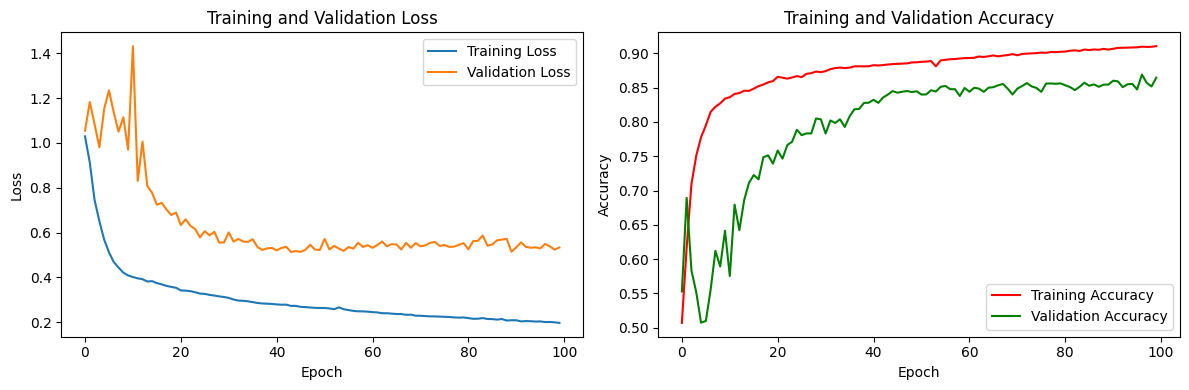

In [15]:
import matplotlib.pyplot as plt

# Plotting Loss and Accuracy
plt.figure(figsize=(12, 4))

# Plot Training Loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
# plt.ylim([0,5])
plt.legend()

# Plot Training Accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy', color='r')
plt.plot(val_accuracies, label='Validation Accuracy', color='g')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.legend()

plt.tight_layout()
plt.show()


In [16]:
# Set the model to evaluation mode
model.eval()

# Initialize lists to store predicted and true labels
all_pred_labels = []
all_true_labels = []

# Iterate through the testing DataLoader
with torch.no_grad():  # Disable gradient computation for inference
    for batch_X_test, batch_y_test in test_loader:
        # Move the batch of data and labels to the device
        batch_X_test, batch_y_test = batch_X_test.to(device), batch_y_test.to(device)
        
        # Perform a forward pass through the model
        outputs_test = model(batch_X_test)
        
        # Compute the predicted labels
        _, predicted_test = torch.max(outputs_test, 1)
        
        # Accumulate the predicted labels and true labels
        all_pred_labels.extend(predicted_test.cpu().numpy())
        all_true_labels.extend(batch_y_test.cpu().numpy())

# Convert lists to NumPy arrays for further analysis
all_pred_labels = np.array(all_pred_labels)
all_true_labels = np.array(all_true_labels)

# Compute overall accuracy
accuracy_overall = accuracy_score(all_true_labels, all_pred_labels)
print(f"Overall Testing Accuracy: {accuracy_overall:.4f}")

# Compute class-wise accuracy
for i in range(3):  # Assuming 3 classes (wake, NREM, REM)
    class_accuracy = accuracy_score(all_true_labels == i, all_pred_labels == i)
    print(f"Class {i} Accuracy: {class_accuracy:.4f}")


Overall Testing Accuracy: 0.8872
Class 0 Accuracy: 0.9047
Class 1 Accuracy: 0.8991
Class 2 Accuracy: 0.9707


In [ ]:
# def initialize_model(model):
#     # Initialize model parameters here
#     for param in model.parameters():
#         if param.requires_grad:
#             nn.init.xavier_uniform_(param.data)
# initialize_model(model)

In [17]:
# # Define the file path to save the model
# model_path = 'sleep_scoring_model_241103b.pth'

# # Save the model's state_dict to the file path
# torch.save(model.state_dict(), model_path)

# print(f"Model saved to {model_path}")

Model saved to sleep_scoring_model_241103a.pth


In [18]:
# # Define the file path to load the model
# model_path = 'sleep_scoring_model_240.pth'

# # Initialize a new model instance with the same architecture
# model = SleepScoringModel().to(device)

# # Load the model's state_dict from the file path
# model.load_state_dict(torch.load(model_path, map_location=device))

# print(f"Model loaded from {model_path}")

Extracting EDF parameters from D:\Makinson_lab\code\LabCode\Fiber_photometry\mouse_154\mouse_154_240921.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [1]:
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# class SleepScoringModel(nn.Module):
#     def __init__(self, dropout_rate=0.5, weight_decay=1e-4):
#         super(SleepScoringModel, self).__init__()

#         self.conv1 = nn.Conv1d(4, 32, kernel_size=3, stride=1, padding=1)
#         self.conv2 = nn.Conv1d(32, 64, kernel_size=3, stride=1, padding=1)

#         # Add dropout layers
#         self.dropout1 = nn.Dropout(dropout_rate)
#         self.dropout2 = nn.Dropout(dropout_rate)

#         self.fc1 = nn.Linear(64 * 1280, 128)
#         self.fc2 = nn.Linear(128, 3)

#         # Add weight decay to the optimizer (e.g., Adam)
#         self.weight_decay = weight_decay

#     def forward(self, x):
#         x = self.conv1(x)
#         x = F.relu(x)
#         x = self.dropout1(x)  # Apply dropout
#         x = self.conv2(x)
#         x = F.relu(x)
#         x = self.dropout2(x)  # Apply dropout
#         x = x.view(x.size(0), -1)
#         x = self.fc1(x)
#         x = F.relu(x)
#         x = self.fc2(x)
#         return x

# model_path = 'sleep_scoring_model_241022.pth'
# model = SleepScoringModel().to(device)
# model.load_state_dict(torch.load(model_path, map_location=device))
# print(f"Model loaded from {model_path}")

# scaler_CH1 = joblib.load('scaler_CH1_241022.pkl')
# scaler_CH2 = joblib.load('scaler_CH2_241022.pkl')
# scaler_CH3 = joblib.load('scaler_CH3_241022.pkl')
# scaler_CH4 = joblib.load('scaler_CH3_241022.pkl')
# scores = []
# for i in range(8640):
#     start_time = time.time() 
    
#     CH1 = raw[0][0][0][1280*i:1280*(i+1)]
#     CH2 = raw[1][0][0][1280*i:1280*(i+1)]
#     CH3 = raw[2][0][0][1280*i:1280*(i+1)]
#     CH4 = raw[3][0][0][1280*i:1280*(i+1)]
#     scaled_CH1 = scaler_CH1.transform(CH1.reshape(1,1280))
#     scaled_CH2 = scaler_CH2.transform(CH2.reshape(1,1280))
#     scaled_CH3 = scaler_CH3.transform(CH3.reshape(1,1280))
#     scaled_CH4 = scaler_CH4.transform(CH4.reshape(1,1280))
#     X_data = np.vstack([scaled_CH1,scaled_CH2,scaled_CH3,scaled_CH4])
#     tensor_sample = torch.tensor(X_data, dtype=torch.float32).unsqueeze(0).to(device)
#     model.eval()
#     with torch.no_grad():  # Disable gradient computation for inference
#         outputs = model(tensor_sample)
#     _, predicted_label = torch.max(outputs, 1)
#     y_hat = predicted_label.item()
#     scores.append(y_hat)
#     batch_time = time.time() - start_time
#     percentage_complete = (i / 8640) * 100
#     print(f"Processed chunk {i}/{8640} "
#       f"({percentage_complete:.2f}% complete) - Time per batch: {batch_time:.2f} seconds")

In [2]:
# Set up the device (GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the neural network model
class SleepScoringModel(nn.Module):
    def __init__(self, dropout_rate=0.5, weight_decay=1e-4):
        super(SleepScoringModel, self).__init__()

        self.conv1 = nn.Conv1d(4, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv1d(32, 64, kernel_size=3, stride=1, padding=1)

        self.dropout1 = nn.Dropout(dropout_rate)
        self.dropout2 = nn.Dropout(dropout_rate)

        self.fc1 = nn.Linear(64 * 1280, 128)
        self.fc2 = nn.Linear(128, 3)

        self.weight_decay = weight_decay

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.dropout1(x)  # Apply dropout
        x = self.conv2(x)
        x = F.relu(x)
        x = self.dropout2(x)  # Apply dropout
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        return x

# Load the model and scalers
model_path = 'sleep_scoring_model_241103a.pth'
model = SleepScoringModel().to(device)
model.load_state_dict(torch.load(model_path, map_location=device))
model.eval()  # Set model to evaluation mode
print(f"Model loaded from {model_path}")
if next(model.parameters()).is_cuda:
    print("Model is using the GPU.")
else:
    print("Model is using the CPU.")

scaler_CH1 = joblib.load('scaler_CH1_241103.pkl')
scaler_CH2 = joblib.load('scaler_CH2_241103.pkl')
scaler_CH3 = joblib.load('scaler_CH3_241103.pkl')
scaler_CH4 = joblib.load('scaler_CH3_241103.pkl')


Model loaded from sleep_scoring_model_241103a.pth
Model is using the GPU.


In [3]:
mouse_str_all = ['mouse_96', 'mouse_96'] 
date_str_all = ['250508', '250510']
root = 'D:\Makinson_lab\code\LabCode\Fiber_photometry'

In [4]:
# Parameters for batching
batch_size = 16  # Adjust this based on your GPU memory
for mouse_str, date_str in zip(mouse_str_all, date_str_all):
    scores = []
    raw = mne.io.read_raw_edf(root + '/'+ mouse_str+'/'+mouse_str+'_'+date_str+'.edf')

    # Process data in batches with a progress tracker
    total_batches = (8640 + batch_size - 1) // batch_size  # Total number of batches

    for batch_idx in range(0, 8640, batch_size):
        start_time = time.time()  # Start timer for the batch

        # Prepare batch data
        CH1_batch = [raw[0][0][0][1280 * j:1280 * (j + 1)] for j in range(batch_idx, min(batch_idx + batch_size, 8640))]
        CH2_batch = [raw[1][0][0][1280 * j:1280 * (j + 1)] for j in range(batch_idx, min(batch_idx + batch_size, 8640))]
        CH3_batch = [raw[2][0][0][1280 * j:1280 * (j + 1)] for j in range(batch_idx, min(batch_idx + batch_size, 8640))]
        CH4_batch = [raw[3][0][0][1280 * j:1280 * (j + 1)] for j in range(batch_idx, min(batch_idx + batch_size, 8640))]

        # Scale the data
        X_data_batch = np.stack([
            [scaler_CH1.transform(CH1.reshape(1, 1280))[0],
             scaler_CH2.transform(CH2.reshape(1, 1280))[0],
             scaler_CH3.transform(CH3.reshape(1, 1280))[0],
             scaler_CH4.transform(CH4.reshape(1, 1280))[0]]
            for CH1, CH2, CH3, CH4 in zip(CH1_batch, CH2_batch, CH3_batch, CH4_batch)
        ])

        # Convert to a tensor and move to GPU
        tensor_batch = torch.tensor(X_data_batch, dtype=torch.float32).to(device)

        # Use AMP for mixed precision
        with torch.cuda.amp.autocast():
            with torch.no_grad():  # Disable gradient computation for inference
                outputs = model(tensor_batch)
                _, predicted_labels = torch.max(outputs, 1)
                scores.extend(predicted_labels.cpu().tolist())

        # Calculate time taken for the batch
        batch_time = time.time() - start_time

        # Progress tracker
        current_batch = batch_idx // batch_size + 1
        percentage_complete = (current_batch / total_batches) * 100
        print(f"Processed batch {current_batch}/{total_batches} "
              f"({percentage_complete:.2f}% complete) - Time per batch: {batch_time:.2f} seconds")
        np.save(mouse_str+'_'+date_str+'.npy', scores)

Extracting EDF parameters from D:\Makinson_lab\code\LabCode\Fiber_photometry\mouse_96\mouse_96_250508.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Processed batch 1/540 (0.19% complete) - Time per batch: 18.11 seconds
Processed batch 2/540 (0.37% complete) - Time per batch: 16.13 seconds
Processed batch 3/540 (0.56% complete) - Time per batch: 14.44 seconds
Processed batch 4/540 (0.74% complete) - Time per batch: 13.50 seconds
Processed batch 5/540 (0.93% complete) - Time per batch: 13.65 seconds
Processed batch 6/540 (1.11% complete) - Time per batch: 13.50 seconds
Processed batch 7/540 (1.30% complete) - Time per batch: 13.46 seconds
Processed batch 8/540 (1.48% complete) - Time per batch: 13.50 seconds
Processed batch 9/540 (1.67% complete) - Time per batch: 13.52 seconds
Processed batch 10/540 (1.85% complete) - Time per batch: 13.64 seconds
Processed batch 11/540 (2.04% complete) - Time per batch: 13.23 seconds
Processed batch 12/540 (2

Processed batch 112/540 (20.74% complete) - Time per batch: 11.78 seconds
Processed batch 113/540 (20.93% complete) - Time per batch: 12.33 seconds
Processed batch 114/540 (21.11% complete) - Time per batch: 12.00 seconds
Processed batch 115/540 (21.30% complete) - Time per batch: 11.83 seconds
Processed batch 116/540 (21.48% complete) - Time per batch: 11.80 seconds
Processed batch 117/540 (21.67% complete) - Time per batch: 11.92 seconds
Processed batch 118/540 (21.85% complete) - Time per batch: 11.78 seconds
Processed batch 119/540 (22.04% complete) - Time per batch: 11.85 seconds
Processed batch 120/540 (22.22% complete) - Time per batch: 12.25 seconds
Processed batch 121/540 (22.41% complete) - Time per batch: 12.05 seconds
Processed batch 122/540 (22.59% complete) - Time per batch: 11.80 seconds
Processed batch 123/540 (22.78% complete) - Time per batch: 12.02 seconds
Processed batch 124/540 (22.96% complete) - Time per batch: 11.85 seconds
Processed batch 125/540 (23.15% comple

Processed batch 224/540 (41.48% complete) - Time per batch: 9.34 seconds
Processed batch 225/540 (41.67% complete) - Time per batch: 9.63 seconds
Processed batch 226/540 (41.85% complete) - Time per batch: 9.41 seconds
Processed batch 227/540 (42.04% complete) - Time per batch: 9.59 seconds
Processed batch 228/540 (42.22% complete) - Time per batch: 9.13 seconds
Processed batch 229/540 (42.41% complete) - Time per batch: 9.65 seconds
Processed batch 230/540 (42.59% complete) - Time per batch: 9.52 seconds
Processed batch 231/540 (42.78% complete) - Time per batch: 9.21 seconds
Processed batch 232/540 (42.96% complete) - Time per batch: 9.37 seconds
Processed batch 233/540 (43.15% complete) - Time per batch: 9.57 seconds
Processed batch 234/540 (43.33% complete) - Time per batch: 9.44 seconds
Processed batch 235/540 (43.52% complete) - Time per batch: 9.53 seconds
Processed batch 236/540 (43.70% complete) - Time per batch: 9.88 seconds
Processed batch 237/540 (43.89% complete) - Time pe

Processed batch 337/540 (62.41% complete) - Time per batch: 9.31 seconds
Processed batch 338/540 (62.59% complete) - Time per batch: 9.50 seconds
Processed batch 339/540 (62.78% complete) - Time per batch: 9.14 seconds
Processed batch 340/540 (62.96% complete) - Time per batch: 9.31 seconds
Processed batch 341/540 (63.15% complete) - Time per batch: 10.05 seconds
Processed batch 342/540 (63.33% complete) - Time per batch: 10.65 seconds
Processed batch 343/540 (63.52% complete) - Time per batch: 10.40 seconds
Processed batch 344/540 (63.70% complete) - Time per batch: 9.12 seconds
Processed batch 345/540 (63.89% complete) - Time per batch: 9.09 seconds
Processed batch 346/540 (64.07% complete) - Time per batch: 9.45 seconds
Processed batch 347/540 (64.26% complete) - Time per batch: 9.09 seconds
Processed batch 348/540 (64.44% complete) - Time per batch: 9.16 seconds
Processed batch 349/540 (64.63% complete) - Time per batch: 10.18 seconds
Processed batch 350/540 (64.81% complete) - Tim

Processed batch 450/540 (83.33% complete) - Time per batch: 9.48 seconds
Processed batch 451/540 (83.52% complete) - Time per batch: 9.66 seconds
Processed batch 452/540 (83.70% complete) - Time per batch: 9.30 seconds
Processed batch 453/540 (83.89% complete) - Time per batch: 9.38 seconds
Processed batch 454/540 (84.07% complete) - Time per batch: 9.28 seconds
Processed batch 455/540 (84.26% complete) - Time per batch: 9.61 seconds
Processed batch 456/540 (84.44% complete) - Time per batch: 10.18 seconds
Processed batch 457/540 (84.63% complete) - Time per batch: 9.15 seconds
Processed batch 458/540 (84.81% complete) - Time per batch: 9.25 seconds
Processed batch 459/540 (85.00% complete) - Time per batch: 9.26 seconds
Processed batch 460/540 (85.19% complete) - Time per batch: 9.29 seconds
Processed batch 461/540 (85.37% complete) - Time per batch: 9.42 seconds
Processed batch 462/540 (85.56% complete) - Time per batch: 9.24 seconds
Processed batch 463/540 (85.74% complete) - Time p

Processed batch 21/540 (3.89% complete) - Time per batch: 9.33 seconds
Processed batch 22/540 (4.07% complete) - Time per batch: 9.14 seconds
Processed batch 23/540 (4.26% complete) - Time per batch: 9.02 seconds
Processed batch 24/540 (4.44% complete) - Time per batch: 8.92 seconds
Processed batch 25/540 (4.63% complete) - Time per batch: 9.40 seconds
Processed batch 26/540 (4.81% complete) - Time per batch: 9.18 seconds
Processed batch 27/540 (5.00% complete) - Time per batch: 9.28 seconds
Processed batch 28/540 (5.19% complete) - Time per batch: 9.28 seconds
Processed batch 29/540 (5.37% complete) - Time per batch: 9.33 seconds
Processed batch 30/540 (5.56% complete) - Time per batch: 9.31 seconds
Processed batch 31/540 (5.74% complete) - Time per batch: 8.98 seconds
Processed batch 32/540 (5.93% complete) - Time per batch: 9.51 seconds
Processed batch 33/540 (6.11% complete) - Time per batch: 9.36 seconds
Processed batch 34/540 (6.30% complete) - Time per batch: 9.35 seconds
Proces

Processed batch 135/540 (25.00% complete) - Time per batch: 9.63 seconds
Processed batch 136/540 (25.19% complete) - Time per batch: 9.30 seconds
Processed batch 137/540 (25.37% complete) - Time per batch: 9.01 seconds
Processed batch 138/540 (25.56% complete) - Time per batch: 9.18 seconds
Processed batch 139/540 (25.74% complete) - Time per batch: 9.42 seconds
Processed batch 140/540 (25.93% complete) - Time per batch: 9.20 seconds
Processed batch 141/540 (26.11% complete) - Time per batch: 9.26 seconds
Processed batch 142/540 (26.30% complete) - Time per batch: 9.35 seconds
Processed batch 143/540 (26.48% complete) - Time per batch: 9.17 seconds
Processed batch 144/540 (26.67% complete) - Time per batch: 9.29 seconds
Processed batch 145/540 (26.85% complete) - Time per batch: 9.36 seconds
Processed batch 146/540 (27.04% complete) - Time per batch: 9.39 seconds
Processed batch 147/540 (27.22% complete) - Time per batch: 9.30 seconds
Processed batch 148/540 (27.41% complete) - Time pe

Processed batch 248/540 (45.93% complete) - Time per batch: 9.03 seconds
Processed batch 249/540 (46.11% complete) - Time per batch: 9.62 seconds
Processed batch 250/540 (46.30% complete) - Time per batch: 9.12 seconds
Processed batch 251/540 (46.48% complete) - Time per batch: 9.07 seconds
Processed batch 252/540 (46.67% complete) - Time per batch: 9.21 seconds
Processed batch 253/540 (46.85% complete) - Time per batch: 9.14 seconds
Processed batch 254/540 (47.04% complete) - Time per batch: 9.21 seconds
Processed batch 255/540 (47.22% complete) - Time per batch: 9.26 seconds
Processed batch 256/540 (47.41% complete) - Time per batch: 9.00 seconds
Processed batch 257/540 (47.59% complete) - Time per batch: 9.15 seconds
Processed batch 258/540 (47.78% complete) - Time per batch: 9.45 seconds
Processed batch 259/540 (47.96% complete) - Time per batch: 9.02 seconds
Processed batch 260/540 (48.15% complete) - Time per batch: 9.12 seconds
Processed batch 261/540 (48.33% complete) - Time pe

Processed batch 361/540 (66.85% complete) - Time per batch: 9.41 seconds
Processed batch 362/540 (67.04% complete) - Time per batch: 9.73 seconds
Processed batch 363/540 (67.22% complete) - Time per batch: 9.37 seconds
Processed batch 364/540 (67.41% complete) - Time per batch: 9.34 seconds
Processed batch 365/540 (67.59% complete) - Time per batch: 9.44 seconds
Processed batch 366/540 (67.78% complete) - Time per batch: 9.60 seconds
Processed batch 367/540 (67.96% complete) - Time per batch: 9.34 seconds
Processed batch 368/540 (68.15% complete) - Time per batch: 9.56 seconds
Processed batch 369/540 (68.33% complete) - Time per batch: 9.37 seconds
Processed batch 370/540 (68.52% complete) - Time per batch: 9.40 seconds
Processed batch 371/540 (68.70% complete) - Time per batch: 9.40 seconds
Processed batch 372/540 (68.89% complete) - Time per batch: 9.43 seconds
Processed batch 373/540 (69.07% complete) - Time per batch: 9.35 seconds
Processed batch 374/540 (69.26% complete) - Time pe

Processed batch 474/540 (87.78% complete) - Time per batch: 9.27 seconds
Processed batch 475/540 (87.96% complete) - Time per batch: 9.29 seconds
Processed batch 476/540 (88.15% complete) - Time per batch: 9.24 seconds
Processed batch 477/540 (88.33% complete) - Time per batch: 9.37 seconds
Processed batch 478/540 (88.52% complete) - Time per batch: 9.28 seconds
Processed batch 479/540 (88.70% complete) - Time per batch: 9.32 seconds
Processed batch 480/540 (88.89% complete) - Time per batch: 9.38 seconds
Processed batch 481/540 (89.07% complete) - Time per batch: 9.56 seconds
Processed batch 482/540 (89.26% complete) - Time per batch: 9.31 seconds
Processed batch 483/540 (89.44% complete) - Time per batch: 9.31 seconds
Processed batch 484/540 (89.63% complete) - Time per batch: 9.27 seconds
Processed batch 485/540 (89.81% complete) - Time per batch: 9.24 seconds
Processed batch 486/540 (90.00% complete) - Time per batch: 9.33 seconds
Processed batch 487/540 (90.19% complete) - Time pe